In [32]:
import pandas as pd
exp = 'ssim'
HZ = '30hz'
re = "720p"
df_1x = pd.read_csv(f'/home/hanling/HunyuanVideo_efficiency/analysis_ci/analysis_results_{HZ}_{exp}_1x_{re}/raw_metrics_v2.csv')
df_2x = pd.read_csv(f'/home/hanling/HunyuanVideo_efficiency/analysis_ci/analysis_results_{HZ}_{exp}_2x_{re}/raw_metrics_v2.csv')
df_4x = pd.read_csv(f'/home/hanling/HunyuanVideo_efficiency/analysis_ci/analysis_results_{HZ}_{exp}_4x_{re}/raw_metrics_v2.csv')
# 创建一个 df, 只保留 file_name, chunk_idx, tile_ci 列。这里默认三个 csv 的 file_name, chunk_idx, tile_ci 相同。
df_merged = df_1x[['file_name', 'chunk_idx', 'tile_ci']].copy()

# 把 1x 中的 psnr/ssim/lpips 加入
df_merged['psnr_1x'] = df_1x['psnr']
df_merged['ssim_1x'] = df_1x['ssim']
df_merged['lpips_1x'] = df_1x['lpips']

# 把 2x 中的 psnr/ssim/lpips 加入
df_merged['psnr_2x'] = df_2x['psnr']
df_merged['ssim_2x'] = df_2x['ssim']
df_merged['lpips_2x'] = df_2x['lpips']

# 把 4x 中的 psnr/ssim/lpips 加入
df_merged['psnr_4x'] = df_4x['psnr']
df_merged['ssim_4x'] = df_4x['ssim']
df_merged['lpips_4x'] = df_4x['lpips']


In [33]:
import numpy as np

# 提取 tile_ci -> cc
tile_ci = df_merged['tile_ci'].values
cc = 1.0 - tile_ci
inds = np.argsort(cc)

# 准备存放所有结果的 dict
all_ssim = {}
all_psnr = {}
all_lpips = {}

all_ssim['1x'] = df_merged['ssim_1x'].values
all_ssim['2x'] = df_merged['ssim_2x'].values
all_ssim['4x'] = df_merged['ssim_4x'].values

all_psnr['1x'] = df_merged['psnr_1x'].values
all_psnr['2x'] = df_merged['psnr_2x'].values
all_psnr['4x'] = df_merged['psnr_4x'].values

all_lpips['1x'] = df_merged['lpips_1x'].values
all_lpips['2x'] = df_merged['lpips_2x'].values
all_lpips['4x'] = df_merged['lpips_4x'].values


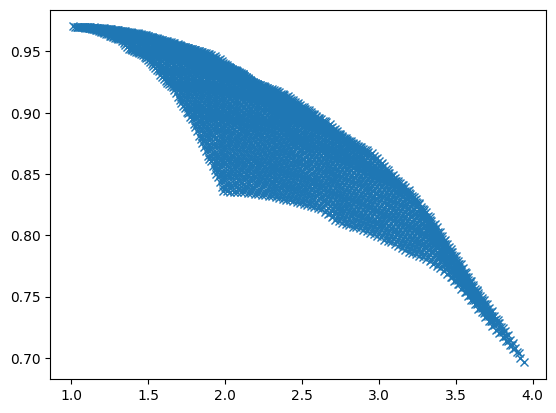

0.9704534090909092 38.85373181818182 0.03683409090909091
0.8318840909090909 31.228262500000003 0.09728749999999999
0.6838386363636364 25.684195454545453 0.1618715909090909
0.9437977272727274 36.00393522727273 0.04865113636363636
0.8670897727272727 31.324195454545453 0.08133181818181817
0.9642124999999999 38.06615227272727 0.03999204545454546


In [34]:
# 你原来的循环代码
X = []
Y = []
best_ssim_1_5x = 0
best_ssim_2x = 0
best_ssim_3x = 0
best_psnr_1_5x = 0
best_psnr_2x = 0
best_psnr_3x = 0
best_lpips_2x = 9999
best_lpips_3x = 9999
best_lpips_1_5x = 9999

for i in range(len(cc)):
    for j in range(i+1, len(cc)):
        x4_ssim = np.array(all_ssim['4x'])[inds[:i]].sum()
        x2_ssim = np.array(all_ssim['2x'])[inds[i:j]].sum()
        x1_ssim = np.array(all_ssim['1x'])[inds[j:]].sum()
        tot_ssim = (x4_ssim + x2_ssim + x1_ssim) / len(cc)

        x4_psnr = np.array(all_psnr['4x'])[inds[:i]].sum()
        x2_psnr = np.array(all_psnr['2x'])[inds[i:j]].sum()
        x1_psnr = np.array(all_psnr['1x'])[inds[j:]].sum()
        tot_psnr = (x4_psnr + x2_psnr + x1_psnr) / len(cc)

        x4_lpips = np.array(all_lpips['4x'])[inds[:i]].sum()
        x2_lpips = np.array(all_lpips['2x'])[inds[i:j]].sum()
        x1_lpips = np.array(all_lpips['1x'])[inds[j:]].sum()
        tot_lpips = (x4_lpips + x2_lpips + x1_lpips) / len(cc)

        cr = (4*i + (j - i)*2 + (len(cc) - j)) / len(cc)
        X.append(cr)
        Y.append(tot_ssim)
        if abs(cr-2) <= 0.05 and tot_ssim > best_ssim_2x:
            best_ssim_2x = tot_ssim
            best_psnr_2x = tot_psnr
            best_lpips_2x = tot_lpips
        if abs(cr-3) <= 0.05 and tot_ssim > best_ssim_3x:
            best_ssim_3x = tot_ssim
            best_psnr_3x = tot_psnr
            best_lpips_3x = tot_lpips
        if abs(cr-1.5)<=0.05 and tot_ssim>best_ssim_1_5x:
            best_ssim_1_5x=tot_ssim
            best_psnr_1_5x=tot_psnr
            best_lpips_1_5x=tot_lpips

# 后面画图打印之类...
import matplotlib.pyplot as plt
plt.plot(X, Y, 'x')
plt.show()

print(np.array(all_ssim['1x']).mean(), np.array(all_psnr['1x']).mean(), np.array(all_lpips['1x']).mean())
print(np.array(all_ssim['2x']).mean(), np.array(all_psnr['2x']).mean(), np.array(all_lpips['2x']).mean())
print(np.array(all_ssim['4x']).mean(), np.array(all_psnr['4x']).mean(), np.array(all_lpips['4x']).mean())

print(best_ssim_2x, best_psnr_2x, best_lpips_2x)
print(best_ssim_3x, best_psnr_3x, best_lpips_3x)
print(best_ssim_1_5x, best_psnr_1_5x, best_lpips_1_5x)
